# **🧬🧬 Proyecto Genómica Computacional 🧬🧬**

# 🐘<font color='green'>*Similitudes de algunos elefantes modernos  con los mamuts* </font> 🐘

### 🖊️ **Autores:**

*   Aquino Chapa Armando Abraham  <font color='brown'>317058163</font>
*   Terrazas Rivera Alejandro <font color='brown'>421006692</font>
*   Gutiérrez Medina Sebastián Alejandro  <font color='brown'>318287021</font>

---

*   <font color='grey'>Profesor: </font> Sergio Hernández López
*   <font color='grey'>Ayudante: </font> Jazmín de Jesús Santillán Manjarrez
*   <font color='grey'>Ayudante: </font> Rafael López Martínez
*   <font color='grey'>Ayudante: </font> Maira Nayeli Luis Vargas



El objetivo de este proyecto es determinar a través del <font color='blue'>DNA mitocondrial (**mtDNA**)</font> cuál de los siguientes elefantes modernos está más relacionado con el mamut lanudo (<font color='red'>*Mammuthus Primigenius*</font>):



*   Elefante Africano (<font color='red'>*Loxodonta Africana*</font>)
*   Elefante Asiático (<font color='red'>*Elephas Maximus*</font>)
*   Musaraña Elefante (<font color='red'>*Elpehantulus sp. VB001*</font>)


![](https://drive.google.com/uc?id=1-q1ZLPhrAeu-3qeYgNZFjOLKjkiDQ7p-)


Para ello realizaremos el siguiente procedimiento (que más adelante será detallado paso a paso):

1.   Elminar las <font color='red'>HVR</font> de las secuencias de <font color='blue'>mtDNA</font>
2.   <font color='red'>Alineamiento global</font> de las secuencias de <font color='blue'>mtDNA</font>
3.   Estimar la <font color='red'>distancia genética</font> utilizando el modelo de Jukes-Cantor
5.   Crear una gráfica para observar los resultados  



### <font color='brown'>¿Por qué utilizamos el DNA mitocondrial? </font>



Las <font color='blue'>*mitocondrias* </font>  son orgánulos de celulas eucariontas implicadas en la <font color='orange'>*producción de energía* </font> de las células. Las  <font color='blue'>*mitocondrias* </font>  se constituyen de su propio cromosoma circular (a diferencia del cromosoma en forma de "X" del DNA nuclear) de 16569 de bases para los humanos, que contiene 37 genes codificantes de proteinas y genes de ARN.

A diferencia del DNA nuclear, sólo podemos heredar DNA mitocondrial de nuestras madres, por lo que se tenemos una versión a comparación del genoma nuclear, donde tenemos la versión de nuestro padre y madre. Cada célula contiene múltiples copias de este <font color='blue'>mtDNA</font>.

En el caso del mamut lanudo, según el artículo titulado "[Complete Mitochondrial Genome and Phylogeny of Pleistocene MammothMammuthus primigenius](https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.0040073)", el genoma mitocondrial del mamut contiene:


*   13 genes codificadores de proteínas
*   22 genes de ARNt
*   Dos genes de ARNr
*   La región de control D-loop

![](https://drive.google.com/uc?id=1ZjrKcZQjY_80sh4y1IrSjw-9nelBloEZ)


Podemos decir que hay dos ventajas principales de utilizar <font color='blue'>mtDNA</font> sobre DNA nuclear:


*   El elevado número de copias de estos genomas en cada célula. Esto hace que sea relativamente más fácil extraer DNA de tejidos más antiguos
*   Cómo las mitoncondrias sólo se transmiten a través de la madre, cada individuo tiene una sola version de <font color='blue'>mtDNA</font>,


### <font color='brown'>*Preliminares:*</font>  *Cargar y limpiar los archivos*

Lo primero que haremos será cargar los archivos <font color='brown'>*.fasta*</font> que corresponden al <font color='brown'>DNA mitocondrial</font> del *Mamut y los Efantes modernos*. Esto lo haremos a través del enlace a  *Google Drive* donde se almacenan estos archivos, creando así una copia de este archivo en el entorno de trabajo

In [ ]:
import requests

def descargar_archivo(url, nombre_archivo):
  """
  Descarga un archivo a través de su url
  @param url: Ruta del archivo
  @param nombre_archivo: Nombre con el que se guardara el archivo
  @return: Secuencia sin el encabezado y espacios
  """
  respuesta = requests.get(url) # Realizamos la solicitud para descargar el archivo

  if respuesta.status_code == 200:  # Verificamos que la peticion sea exitosa
    with open(nombre_archivo, 'wb') as f:
      f.write(respuesta.content)
      print("Archivo descargado correctamente.")
  else:
    print("Error al descargar el archivo. Estado:", respuesta.status_code)


In [ ]:
url_mamut = 'https://drive.google.com/uc?id=1TleQt6McAif6o3BBICCiIiX0Yie2Dbki'
url_loxodonta = 'https://drive.google.com/uc?id=1S_CqW2rnCpWgrtucq7xUsmPVr6Q8S_0l'
url_elephas = 'https://drive.google.com/uc?id=1rz4dZwCD5_PKDVZnnOIwpVOGUyjgXq10'
url_elephantulus = 'https://drive.google.com/uc?id=1I9hDsdI0LFWDGARFEb1imcU_iZcbbyxy'

descargar_archivo(url_mamut, "MammuthusPrimigenius.fasta")
descargar_archivo(url_loxodonta, "LoxodontaAfricana.fasta")
descargar_archivo(url_elephas, "ElephasMaximus.fasta")
descargar_archivo(url_elephantulus, "ElephantulusVB001.fasta")

Archivo descargado correctamente.
Archivo descargado correctamente.
Archivo descargado correctamente.
Archivo descargado correctamente.


Por último limpiamos los archivos para eleminar los encabezados, espacios y saltos de línea.

In [ ]:
def limpiar_fasta(path_archivo):
  """
  Elimina los encabezados y los espcacios innecesarios de un archivo .fasta
  @param path_archivo: Ruta del archivo
  @return: Secuencia sin el encabezado y espacios
  """
  secuencias = []
  with open(path_archivo, 'r') as archivo:
    for linea in archivo:
      if not linea.startswith('>'):
        secuencias.append(linea.strip())
  secuencia = ''.join(secuencias)
  return secuencia

In [ ]:
mtDNA_Mammuthus_Primigenius = limpiar_fasta("/content/MammuthusPrimigenius.fasta")
mtDNA_Loxodonta_Africana = limpiar_fasta("/content/LoxodontaAfricana.fasta")
mtDNA_Elephas_Maximus = limpiar_fasta("/content/ElephasMaximus.fasta")
mtDNA_Elephantulus_VB001 = limpiar_fasta("/content/MammuthusPrimigenius.fasta")

## <font color='brown'>1. Eliminar las Regiones Hipervariables (*HVR*)</font>


El DNA mitocondrial cuenta con una región específica, que no contiene ningún gen, conocida como <font color='red'>*D-loop*</font> o región de control de aproximadamete 1,1 kb que es una secuencia no codificante en el genoma mitocondrial, pero es fundamental para la <font color='red'>replicación</font> y la <font color='red'>*transcripción*</font> del DNA mitocondrial. El origen de la replicación es donde comienza la replicación del genoma circular: el promotor es donde comienza la transcripción de todos los genes del <font color='blue'>mtDNA</font>

El <font color='red'>*D-loop*</font> contiene también dos regiones hipervaribales sin función conocida: denominadas como regiones I y II (<font color='blue'>HVR-I</font> y <font color='blue'>HVR-II</font>). Estas regiones se encuentran a cada lado del inicio de inicio de la replicación y constituyen la mayor parte del <font color='red'>*D-loop*</font> (cada uno tiene una longitud de entre 400-500 pb)

![](https://drive.google.com/uc?id=1AU8I0caRC5TvORlZlKOIoIIuBxP6jhz3)

Cómo se aprecia en la imagen de arriba, en el caso de los humanos las dos HVR tienen posiciones aproximadamente *16024-16400* (para <font color='blue'>HVR-II</font>) y posiciones *1-500* (para <font color='blue'>HVR-II</font>). Hay que tomar en cuenta que la numeración de las posiciones siempre es algo arbitraria (ya que la longitud puede cambiar debido a inserciones o eliminaciones).

En nuestro caso, al realizar una exhaustiva busqueda a través del GenBank no encontramos las <font color='blue'>HVR</font> completas de los individuos a analizar, por lo que solo eliminaremos los fragmentos que encontramos.


In [ ]:
def encontrar_y_cortar_segmento_hvr(mtdna, segmento_hvr):
  """
  Busca el fragmento hvr en la secuencia de mtdna. Se imprime su posición se elimina
  @param mtdna: Secuencia de dna mitocondrial
  @param segmento_hvr: Segmento HVR a eliminar
  @return: Secuencia sin el fragmento HVR
  """

  inicio = mtdna.find(segmento_hvr)
  if inicio != -1:
    final = inicio + len(segmento_hvr)
    print(f"El fragmento HVR se encuentra desde la posición {inicio} hasta la posición {final - 1}.")
    mtdna_sin_hvr = mtdna[:inicio] + mtdna[final:]
    print(len(mtdna_sin_hvr))
    return mtdna_sin_hvr
  else:
    print("La subcadena no está presente.")
    return mtdna


En este caso del <font color='red'>mamut lanudo</font>  encontramos un pequeño frgamento de una región hipervariable que puede ser consultado [aquí](https://www.ncbi.nlm.nih.gov/nuccore/AF361999.1).

Para el <font color='red'>elefante africano</font>  también encontramos un fragmento que puede ser consultado [aquí](https://www.ncbi.nlm.nih.gov/nuccore/MG661916.1)

Para el <font color='red'>elefante asiático</font> encontramos un fragmento que puede ser consultado [aquí](https://www.ncbi.nlm.nih.gov/nuccore/AF358450.1)

Para la <font color='red'>musaraña elefante</font> no encontramos ningún fragmento de regiones HVR

In [ ]:
hypervariable_segment_mamut = "ACTATAGATGAAATCAAGAGTATAAACGGGAGGCGTAACTAGTTACATAGGGGTGAAAGCA"
mtDNA_nHVR_Mammuthus_Primigenius = encontrar_y_cortar_segmento_hvr(mtDNA_Mammuthus_Primigenius, hypervariable_segment_mamut)

hvrI_segment_loxodonta = "AATCAACCCGCTATGTATATCGTGCATTAAATGCTTGTCCCCATACATAATGATATATATTACTAACTATACTTAATCTTACATAGACCATACTATGTATAATCGTGCATCACATTATTTACCCCATGCTTATAA"
mtDNA_nHVR_LoxodontaAfricana = encontrar_y_cortar_segmento_hvr(mtDNA_Loxodonta_Africana, hvrI_segment_loxodonta)

hvrI_elephas = "CAAGTAAATCAATCCGCTATGTACATCGTGCATTAAATGCTCGTCCCCATACATAATGATATATAATACTAACTATACTTAATCTTACATAGACCATACTATGTATAATCGTGCATCACATTATTTACCCCATGCTTATAAGCAAGCACTGTTTAATCAATGTGTCAAGTCATATTCCTGTAGATTCACAGGTTATGTTTTAGTTCATGGATATTGTTCACCTACGATAAACCATAGTCTTACATAGCACATTAAAGCTCTTGATCGTGCATAGCGCATTACTGAGAAATCTCTAGTCATCATGCATATCACCTCCAACGG"
mtDNA_nHVR_ElephasMaximus = encontrar_y_cortar_segmento_hvr(mtDNA_Elephas_Maximus, hvrI_elephas)



El fragmento HVR se encuentra desde la posición 16585 hasta la posición 16645.
16709
El fragmento HVR se encuentra desde la posición 15422 hasta la posición 15556.
16731
El fragmento HVR se encuentra desde la posición 15418 hasta la posición 15738.
16581


## <font color='brown'>2. Alineamiento global de las secuencias de mtDNA</font>

El propósito del <font color='red'>alineamiento de secuencias</font> es <font color='green'>medir la similitud de las secuencias o ver que tan parecidas son las secuencias entre sí.</font> Algunos de los usos de la alineación de secuencias son:



*   <font color='green'>*Hallazgos de genes:*</font> La comparación de secuencias genómicas completas de dos o más organismos puede revelar la ubicación de genes previamente desconocidos.
*   <font color='green'>*Divergencia de secuencias*</font>: La cantidad de divergencia (o similitud) entre dos secuencias puede indicarnos que tan estrechamente relacionadas están las secuencias.





Un <font color='red'>alineamiento de global</font> de dos secuencias se puede considerar como una representación de la correspondencia entre sus nucleótidos. Si dos secuencias tienen el mismo ancestro, se espera que tengan muchos de estos "símbolos" en común. Se define al alineamiento global como:



> Un <font color='red'>alineamiento de global</font> de dos secuencias <font color='green'>*s*</font> y <font color='green'>*t*</font>, es una asignación de símbolos de espacio **"-"** en esas secuencias. Las dos cadenas resultantes se colocan una encima de la otra de modo que cada carácter o símbolo de espacio en cualquiera de las cadenas esté frenta  a un carácter único o un símbolo de espacio único en la otra cadena.


Nosotros utilizaremos el algoritmo de <font color='green'>**Needleman-Wunsch**</font>



> <font color='green'>**Algoritmo de alineamiento global Needleman-Wunsch:**</font>


*   Crear una tabla de tamaño $(m+1) \times (n+1)$ para las secuencias digamos <font color='green'>$s$</font> y <font color='green'>$t$</font> de longitud $m$ y $n$
*   Completar las entradas de la tabla $(m : 1)$ y $(1:n)$ con la fórmula:

    *    $M_{i, 1} = \sum_{k=1}^{i}σ (s_{k}, -)$
    *    $M_{1, j} = \sum_{k=1}^{j}σ (-, t_{k})$

*   Comenazando desde la parte superior izquierda, calcular cada entrada usando la relación recursiva:
    *    
$\
M_{i,j} = \max \left\{ \begin{array}{l}
M_{i-1,j} + \sigma(s_i, -) \qquad\qquad \text{Fila de arriba} \\
M_{i,j-1} + \sigma(-, t_j)  \qquad\qquad \text{Columna izquierda} \\
M_{i-1,j-1} + \sigma(s_i, t_j) \qquad\qquad \text{Diagonal}
\end{array} \right.
$
*    Realizar el procedimiento de trace-back para obtener el alineamiento óptimo recordando cada elección de la relación recursiva. Para cada paso diagonal hay una correspondencia o discrepancia (match/mismatch) en el alineamiento: Para cada paso vertical se inserta un gap  en la secuencia superior: Para cada paso horizontal se inserta un gap en la secuencia del costado:

In [ ]:
def Needleman_Wunsch(seq1, seq2, match_score=1, mismatch_penalty=-1, gap_penalty=-1):
  """
  Algoritmo de Needleman-Wunsch para el alineamiento global de secuencias
  @param seq1: Primera secuencia a alinear
  @param seq2: Segunda secuencia a alinear
  @param match_score: Score por coincidencia de caracteres.
  @param mismatch_penalty: Score por no coincidencia de caracteres (penalizacion)
  @param gap_penalty: Score por insercion del gap en el alineamiento.
  @return: Cadenas que representan el alineamiento de las secuencias.
  """
  # Se crea la matriz de scores
  n, m = len(seq1), len(seq2)
  score_matrix = [[0] * (m + 1) for _ in range(n + 1)]

  # Inicializnado  la matriz de scores
  for i in range(n + 1):
    score_matrix[i][0] = i * gap_penalty
  for j in range(m + 1):
    score_matrix[0][j] = j * gap_penalty

  # Se completa la matriz de socores
  for i in range(1, n + 1):
    for j in range(1, m + 1):
      if seq1[i-1] == seq2[j-1]:
        score_diagonal = score_matrix[i-1][j-1] + match_score
      else:
        score_diagonal = score_matrix[i-1][j-1] + mismatch_penalty

      score_up = score_matrix[i-1][j] + gap_penalty
      score_left = score_matrix[i][j-1] + gap_penalty
      score_matrix[i][j] = max(score_diagonal, score_up, score_left)

  # Trace-back
  align1, align2 = '', ''
  i, j = n, m
  while i > 0 and j > 0:
    score_current = score_matrix[i][j]
    score_diagonal = score_matrix[i-1][j-1]
    score_up = score_matrix[i-1][j]
    score_left = score_matrix[i][j-1]

    if score_current == score_diagonal + (match_score if seq1[i-1] == seq2[j-1] else mismatch_penalty):
      align1 += seq1[i-1]
      align2 += seq2[j-1]
      i -= 1
      j -= 1
    elif score_current == score_up + gap_penalty:
      align1 += seq1[i-1]
      align2 += '-'
      i -= 1
    else:
      align1 += '-'
      align2 += seq2[j-1]
      j -= 1

  while i > 0:
    align1 += seq1[i-1]
    align2 += '-'
    i -= 1

  while j > 0:
    align1 += '-'
    align2 += seq2[j-1]
    j -= 1

  return align1[::-1], align2[::-1]

In [ ]:
# Se tarda como 12 minutos en ejecutarse
# Omitir esta celda y la de abajo

A1_mtDNA_Mammuthus_Primigenius, _mtDNA_LoxodontaAfricana = Needleman_Wunsch(mtDNA_nHVR_Mammuthus_Primigenius, mtDNA_nHVR_LoxodontaAfricana) # Se tarda como 12 minutos en ejecutarse

A2_mtDNA_align_Mammuthus_Primigenius, _mtDNA_nHVR_ElephasMaximus = Needleman_Wunsch(mtDNA_nHVR_Mammuthus_Primigenius, mtDNA_nHVR_ElephasMaximus)

A3_mtDNA_align_Mammuthus_Primigenius, _mtDNA_Elephantulus_VB001 = Needleman_Wunsch(mtDNA_nHVR_Mammuthus_Primigenius, mtDNA_Elephantulus_VB001)

In [ ]:
# Utilizar las siguientes variables para todo el demas proceimiento
# Omitir esta celda

print("Alineamiento entre el mamut y elefante africano")
print(A1_mtDNA_Mammuthus_Primigenius)
print(_mtDNA_LoxodontaAfricana)
print("")

print("Alineamiento entre el mamut y elefante asiático")
print(A2_mtDNA_align_Mammuthus_Primigenius)
print(_mtDNA_nHVR_ElephasMaximus)
print("")

print("Alineamiento entre el mamut y la musaraña elefante")
print(A3_mtDNA_align_Mammuthus_Primigenius)
print(_mtDNA_Elephantulus_VB001)

Alineamiento entre el mamut y elefante africano


NameError: name 'A1_mtDNA_Mammuthus_Primigenius' is not defined

In [ ]:
# Para evitar que se tarden mucho en generar los alineamientos guardamos resultados
# previos en archivos

url_A1_mamut = 'https://drive.google.com/uc?id=17ROIniu-xy8Oq2D6noaPiPv5zI3SyGga'
url_A_loxodonta = 'https://drive.google.com/uc?id=1KMNwQrvLf-eHoDalWCQ9zW6sZcNdNhrc'

url_A2_mamut = 'https://drive.google.com/uc?id=1SV_GF5pBOgVb7gfNvTJeDooBIY2WdnbU'
url_A_elephas = 'https://drive.google.com/uc?id=1ZGhCIOzddT-8mkuBeyuuzUukMWj_lT6y'

url_A3_mamut = 'https://drive.google.com/uc?id=1DihlxKVrv783hGQ6QNFdTE9Q9RD9YgbU'
url_A_elephantulus = 'https://drive.google.com/uc?id=1ZyoB5sqvty9dSdG40poTv8lRJHq1pWNC'

descargar_archivo(url_A1_mamut, "A1_Mamut.txt")
descargar_archivo(url_A_loxodonta, "A_Loxodonta.txt")

descargar_archivo(url_A2_mamut, "A2_Mamut.txt")
descargar_archivo(url_A_elephas, "A_Elephas.txt")

descargar_archivo(url_A3_mamut, "A3_Mamut.txt")
descargar_archivo(url_A_elephantulus, "A_Elephantulus.txt")

Archivo descargado correctamente.
Archivo descargado correctamente.
Archivo descargado correctamente.
Archivo descargado correctamente.
Archivo descargado correctamente.
Archivo descargado correctamente.


## <font color='brown'>3. Estimar la distancia genética utilizando el modelo de Jukes-Cantor</font>

In [56]:
import numpy as np

def jukes_cantor_distance(seq1, seq2):
    # Verificar que las secuencias tengan la misma longitud
    if len(seq1) != len(seq2):
        raise ValueError("Las secuencias deben tener la misma longitud")

    # Contar el número de diferencias
    differences = sum(1 for a, b in zip(seq1, seq2) if a != b)
    total_sites = len(seq1)

    # Calcular la proporción de sitios diferentes
    p = differences / total_sites

    # Verificar que p sea menor a 3/4 para que la fórmula de Jukes-Cantor sea aplicable
    if p >= 0.75:
        raise ValueError("La proporción de diferencias es demasiado alta para el modelo de Jukes-Cantor")

    # Calcular la distancia genética utilizando la fórmula de Jukes-Cantor
    try:
        d = -0.75 * np.log(1 - (4/3) * p)
    except ValueError:
        raise ValueError("Error al calcular la distancia genética. Verifique las proporciones de sitios diferentes.")

    return d



In [57]:
import matplotlib.pyplot as plt
import os

def read_sequence_from_file(filepath):
    with open(filepath, 'r') as file:
        sequence = file.read().strip()
    return sequence

# Lista de archivos de secuencias (parejas de archivos)
sequence_files = [
    ("/content/A1_Mamut.txt", "/content/A_Loxodonta.txt"), # Africano
    ("/content/A2_Mamut.txt", "/content/A_Elephas.txt"), # Asiatico
    ("/content/A3_Mamut.txt", "/content/A_Elephantulus.txt") # Musaraña

]

# Calcular distancias y almacenar resultados
distances = []
for file1, file2 in sequence_files:
    seq1 = read_sequence_from_file(file1)
    seq2 = read_sequence_from_file(file2)
    distance = jukes_cantor_distance(seq1, seq2)
    distances.append(distance)

print(distances)

[0.06689513067017092, 0.0760340784942497, 0.0036462971318874595]


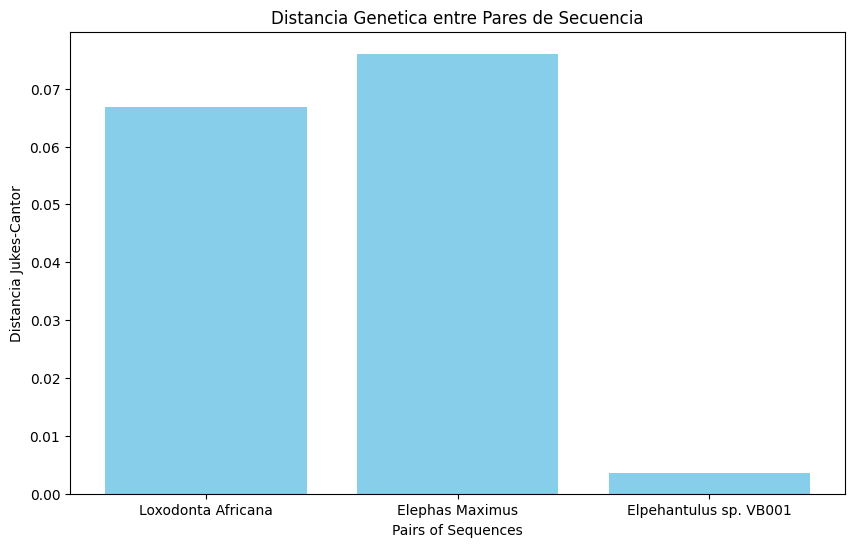

In [58]:
# Preparar datos para graficar
x_labels = ["Loxodonta Africana", "Elephas Maximus", "Elpehantulus sp. VB001"]

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.bar(x_labels, distances, color='skyblue')
plt.xlabel('Pairs of Sequences')
plt.ylabel('Distancia Jukes-Cantor')
plt.title('Distancia Genetica entre Pares de Secuencia')
plt.show()

In [ ]:
#Installing biopython using pip
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.1 MB/s eta 0:00:00


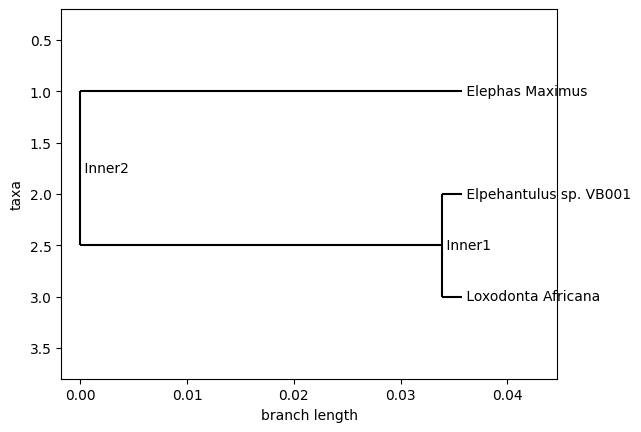

In [ ]:
from Bio.Phylo.TreeConstruction import DistanceMatrix
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import Phylo


# Crear matriz de distancias
matrix = DistanceMatrix(names=x_labels, matrix=[[0],
                                                [distances[0], 0],
                                                [distances[2], distances[1], 0]
                                                ])

# Crear constructor de árbol filogenético
constructor = DistanceTreeConstructor()

# Construir el árbol filogenético
tree = constructor.upgma(matrix)

# Dibujar el árbol filogenético
Phylo.draw(tree)